In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
data = pd.read_csv(r'C:\Users\HP\Pandas_codegym\Phân tích dữ liệu HousePrice\house_price.csv',encoding= 'unicode_escape')
data.head()

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo


In [2]:
data.shape[0]

671

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               665 non-null    float64
 1   price              617 non-null    float64
 2   postDate           671 non-null    int64  
 3   land_certificate   369 non-null    object 
 4   house_direction    42 non-null     object 
 5   balcony_direction  24 non-null     object 
 6   toilet             240 non-null    float64
 7   bedroom            320 non-null    float64
 8   floor              366 non-null    float64
 9   lat                671 non-null    float64
 10  long               671 non-null    float64
 11  property_type      671 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 63.0+ KB


Nhìn tổng quan thì số hàng là 671 nhưng nhiều thuộc tính có số lượng ít hơn 671, có thể có dữ liệu ngoại lai

### Xử lý giá trị khuyết thiếu

In [4]:
df = data.isna().sum().sort_values(ascending=False)
df

balcony_direction    647
house_direction      629
toilet               431
bedroom              351
floor                305
land_certificate     302
price                 54
area                   6
postDate               0
lat                    0
long                   0
property_type          0
dtype: int64

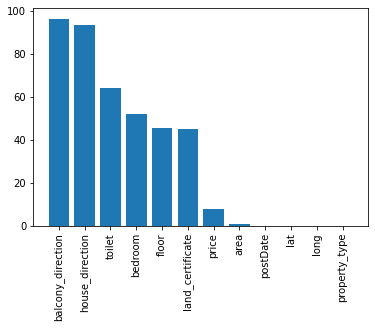

In [5]:
x=df.index
y=100*df.values/data.shape[0]
plt.bar(x,y)
plt.xticks(rotation=90)
plt.show()

##### 1. Xóa bỏ hết tất cả những dòng dữ liệu không có thông tin về giá

In [6]:
price_null_index = data[data['price'].isnull()].index
data.drop(price_null_index, inplace = True)
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,NaN,NaN,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,NaN,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,NaN,NaN,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,NaN,NaN,NaN,NaN,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,NaN,NaN,NaN,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,NaN,NaN,NaN,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,NaN,NaN,NaN,NaN,NaN,NaN,21.016106,105.832157,mat pho


##### 2. Thực hiện xử lý giá trị khuyết thiếu: Thay thế giá trị khuyết thiếu của land_certificate bằng =”không có thông tin”, house_direction, balcony_direction, toilet, bedroom, Floor  bằng giá trị có tần số xuất hiện lớn nhất của các thuộc tính đó,

In [10]:
mode = data[['house_direction','balcony_direction','toilet','bedroom','floor']].mode()
mode.loc[0,'house_direction' ]
# dict_data = {i:mode.loc[0,i] for i in mode.index}
dict_data = {i: mode.loc[0,i] for i in mode.columns}

In [11]:
data.fillna({'land_certificate': 'không có thông tin'}, inplace=True)
data.fillna(dict_data, inplace=True) #dùng pp thay thế trên các cột cụ thể 
# data['house_direction']=data['house_direction'].fillna(data['house_direction'].mode(), inplace=True)

In [12]:
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


In [13]:
# data['house_direction']=data['house_direction'].fillna(data['house_direction'].mode(), inplace=True)
# data['house_direction'].mode()[0] phải lấy 0 vì mode() trả về 1 series,muốn access vô giá trị phải tiếp cận qua pp slide

##### 3. Lọc thông tin những bất động sản ở trong ngõ thành bộ dữ liệu nhà ngõ


In [14]:
data['property_type'].value_counts() 
# => kiểm tra Dữ liệu có 2 loại nhà, format ko cần thay đổi

trong ngo    407
mat pho      210
Name: property_type, dtype: int64

In [15]:
data_nhango = data[data['property_type']=='trong ngo']
data_nhango

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo


##### 4. Tính toán giá/m2  ( đơn vị triệu/m2) với loại hình nhà ngõ

In [16]:
data_nhango['Giá/m2'] = round(10**3*data_nhango['price']/data_nhango['area'])
data_nhango

C:\Users\HP\AppData\Local\Temp\ipykernel_17640\2552636453.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nhango['Giá/m2'] = round(10**3*data_nhango['price']/data_nhango['area'])


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,294000.0
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,73684.0
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,177419.0
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,111538.0
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,98750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,90.0,32000.0,44325,không có thông tin,dong-Bac,Tay-Bac,4.0,3.0,8.0,21.017799,105.810572,trong ngo,355556.0
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,272414.0
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,106250.0
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,102632.0


##### 5. Phát hiện giá trị ngoại lai của các thuộc tính: diện tích, giá/m2 bằng phương pháp IQR

<AxesSubplot:xlabel='Giá/m2'>

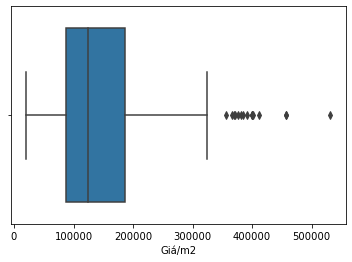

In [17]:
sns.boxplot(x=data_nhango['Giá/m2'])

In [18]:
df = data_nhango[['area','Giá/m2']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
IQR

area         27.75
Giá/m2    99080.75
dtype: float64

##### 6. Thực hiện loại bỏ các dòng dữ liệu ngoại lai

In [19]:
# def quantile_outliers(df, colum):
#     Q1 = df[colum].quantile(0.25)
#     Q3 = df[colum].quantile(0.75)
#     IQR = Q3- Q1
#     index = df[(df[colum] < (Q1 - 1.5*IQR)) | (df[colum]>(Q3 + 1.5*IQR))].index
#     return index
# list_index = []
# for i in ['area','Giá/m2']:
#     list_index.extend(quantile_outliers(data_nhango,i))
# data_nhango.drop(list_index, inplace=True)
# data_nhango

In [20]:
data_not_outliers= data_nhango[~((df<(Q1-1.5*IQR)) | (df> (Q3 + 1.5*IQR))).any(axis=1)]
# data_nhango.drop(data_outliers_index, inplace=True)
# data_nhango
data_not_outliers.isnull().sum()

area                 1
price                0
postDate             0
land_certificate     0
house_direction      0
balcony_direction    0
toilet               0
bedroom              0
floor                0
lat                  0
long                 0
property_type        0
Giá/m2               1
dtype: int64

##### 7. Chuẩn hóa dữ liệu của tất cả các thuộc tính: price/m2 bằng các phương pháp: min-max scaling, z- score scaling, Robust scaling, và so sánh phân bố của thuộc tính này trước và sau khi chuẩn hóa

<AxesSubplot:xlabel='Giá/m2'>

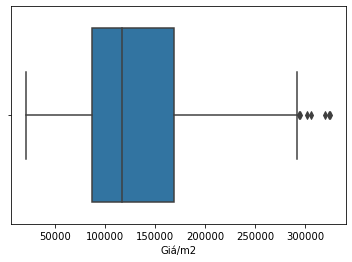

In [21]:
#Trước khi chuẩn hóa dữ liệu
sns.boxplot(x=data_not_outliers['Giá/m2'])

<AxesSubplot:xlabel='Giá/m2', ylabel='Density'>

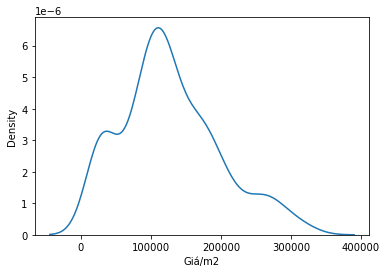

In [22]:
sns.kdeplot(data=data_not_outliers['Giá/m2'])

In [23]:
#Chuẩn hóa bằng pp MinMaxScaler
s_scaler = MinMaxScaler()
df_s = np.array(data_not_outliers['Giá/m2']).reshape(-1,1)
data_not_outliers['Giá/m2'] = s_scaler.fit_transform(df_s)
data_not_outliers

C:\Users\HP\AppData\Local\Temp\ipykernel_17640\3306087489.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_not_outliers['Giá/m2'] = s_scaler.fit_transform(df_s)


,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type,Giá/m2
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo,0.898209
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo,0.174782
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo,0.515405
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo,0.299079
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo,0.257088
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,25.0,2850.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,2.0,4.0,21.029522,105.827353,trong ngo,0.307163
445,58.0,15800.0,44325,So do,dong-Nam,dong-Nam,4.0,5.0,7.0,21.020556,105.828657,trong ngo,0.827329
446,96.0,10200.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.012310,105.828978,trong ngo,0.281715
447,38.0,3900.0,44325,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.006694,105.835635,trong ngo,0.269835


<AxesSubplot:xlabel='Giá/m2', ylabel='Density'>

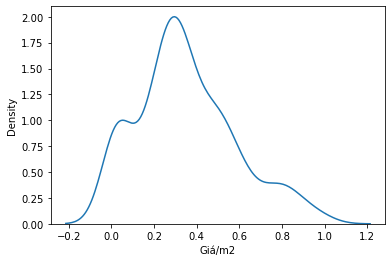

In [24]:
sns.kdeplot(data=data_not_outliers['Giá/m2'])

<AxesSubplot:xlabel='Giá/m2'>

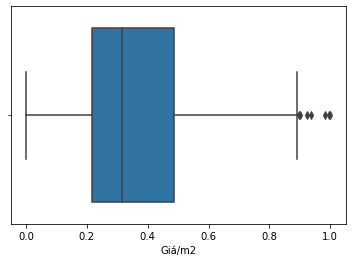

In [25]:
sns.boxplot(x=data_not_outliers['Giá/m2'])

In [26]:
#Hầu như không có sự thay đổi về hình dáng biểu đồ, sau khi chuẩn hóa dữ liệu thu lại về khoảng giá trị nhỏ hơn giá trị ban đầu

Yêu cầu<br>
Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.<br>
Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).<br>

In [27]:
data
#data đã xử lý dữ liệu khuyết thiếu, xóa dữ liệu price ko có giá trị, thay thế các dữ liệu khuyết thiếu

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
666,168.0,23500.0,44325,không có thông tin,dong-Nam,dong-Nam,3.0,3.0,3.0,21.000823,105.829097,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


<AxesSubplot:>

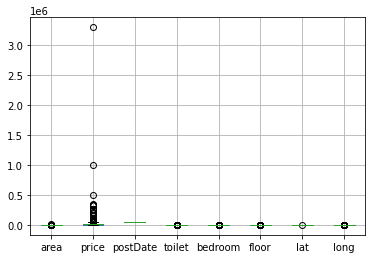

In [28]:
data.boxplot()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

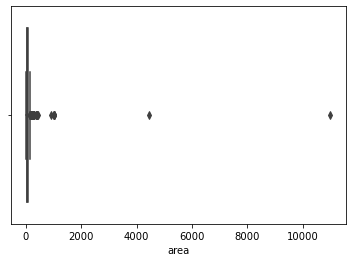

In [29]:
sns.boxplot(data['area'])

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

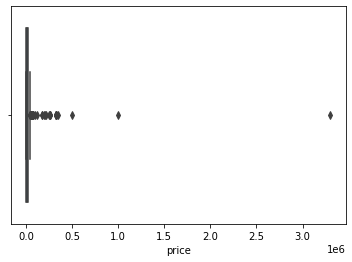

In [30]:
sns.boxplot(data['price'])

In [31]:
data.isnull().sum()
#=> còn dữ liệu area chưa có thông tin 2 cột, tiến hành xóa dữ liệu này để không ảnh hưởng đến tính giá
data.dropna(inplace=True)
data = data[data['area']>0]

In [32]:
#xử lý dữ liệu ngoại lai với 2 cột area và price
df = data[['area','price']]
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# data['Outliner']= ~((df<(Q1-1.5*IQR)) | (df> (Q3 + 1.5*IQR)))
# data = data[data['Outliner']==True]
# data
data= data[~((df<(Q1-1.5*IQR)) | (df> (Q3 + 1.5*IQR))).any(axis=1)]
data

,area,price,postDate,land_certificate,house_direction,balcony_direction,toilet,bedroom,floor,lat,long,property_type
0,50.0,14700.0,44197,So do,dong-Nam,dong-Nam,4.0,6.0,6.0,21.015698,105.824583,trong ngo
1,57.0,4200.0,44265,So do,Nam,Nam,3.0,8.0,4.0,21.025208,105.833111,trong ngo
2,62.0,11000.0,44268,So do,dong-Nam,dong-Nam,6.0,5.0,6.0,21.025379,105.801011,trong ngo
3,26.0,2900.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,4.0,21.014325,105.834918,trong ngo
4,40.0,3950.0,44292,So do,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009862,105.838083,trong ngo
...,...,...,...,...,...,...,...,...,...,...,...,...
664,76.0,30500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.009533,105.820193,mat pho
667,65.0,17500.0,44325,So do,dong-Nam,dong-Nam,4.0,6.0,5.0,21.011495,105.816666,mat pho
668,60.0,17500.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.011495,105.816666,mat pho
669,45.0,24800.0,44197,không có thông tin,dong-Nam,dong-Nam,4.0,3.0,5.0,21.016106,105.832157,mat pho


C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

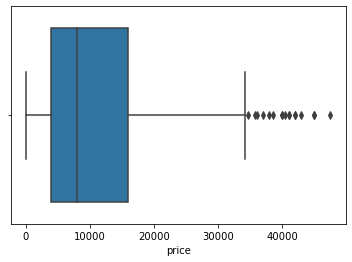

In [33]:
sns.boxplot(data['price'])

# Data Visulization

#### 1. Vẽ biểu đồ phân tích mối liên hệ giữa diện tích với giá nhà, giữa số phòng ngủ với giá nhà, giữa số toilet với giá nhà.<br>

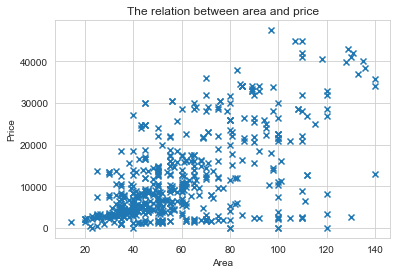

In [37]:
plt.scatter(x=data['area'].values, y=data['price'].values, marker='x')
plt.title('The relation between area and price')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

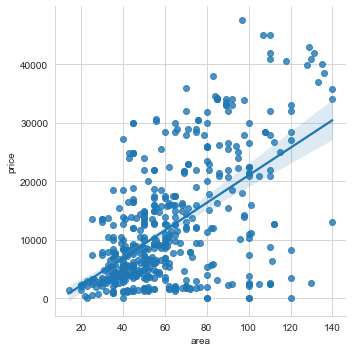

In [38]:
sns.set_style('whitegrid')
sns.lmplot(x='area', y='price', data=data)

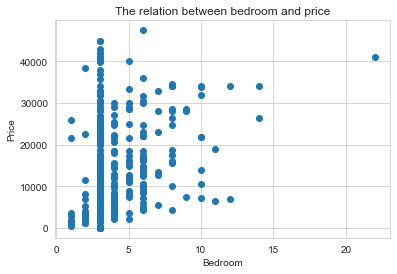

In [39]:
plt.scatter(x=data['bedroom'].values, y=data['price'].values, marker='o')
plt.title('The relation between bedroom and price')
plt.xlabel('Bedroom')
plt.ylabel('Price')
plt.show()

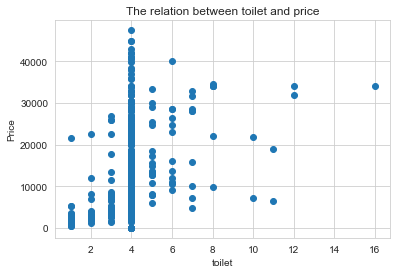

In [40]:
plt.scatter(x=data['toilet'].values, y=data['price'].values, marker='o')
plt.title('The relation between toilet and price')
plt.xlabel('toilet')
plt.ylabel('Price')
plt.show()

#### 2. Vẽ biểu đồ so sánh giá nhà trung bình trên 1 m2 giữa các hình thức nhà (type_of_land).<br>

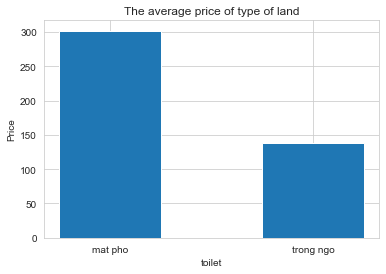

In [41]:
data['Gia/1m2'] = data['price']/data['area']
data1 = data.groupby('property_type')['Gia/1m2'].mean()
# data[data['property_type']=='trong ngo'].min()
data1
# data.isnull().sum()
plt.bar(x = data1.index, height = data1.values, width=0.5)
plt.title('The average price of type of land')
plt.xlabel('toilet')
plt.ylabel('Price')
plt.show()

Vẽ biểu đồ thể hiện tỉ lệ % bài đăng (bản ghi) giữa các hình thức nhà (type_of_land).<br>
Vẽ biểu đồ thể hiện sự thay đổi giá nhà trung bình trên 1m2 theo số lượng phòng ngủ.<br>

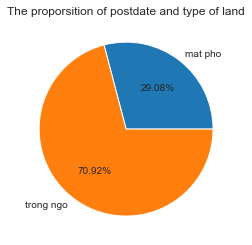

In [42]:
data2 = data.groupby('property_type')['postDate'].sum()
plt.pie(data2, labels = data2.index, autopct='%1.2f%%')
plt.title('The proporsition of postdate and type of land')
plt.show()

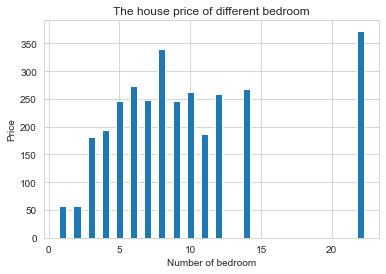

In [43]:
data3 = data.groupby('bedroom')['Gia/1m2'].mean()
plt.bar(x = data3.index, height = data3.values, width=0.5)
plt.title('The house price of different bedroom')
plt.xlabel('Number of bedroom')
plt.ylabel('Price')
plt.show()

#### Phân tích mối liên hệ giữa diện tích với giá nhà. Đồng thời, giữa số phòng ngủ với giá nhà và giữa số toilet với giá nhà.

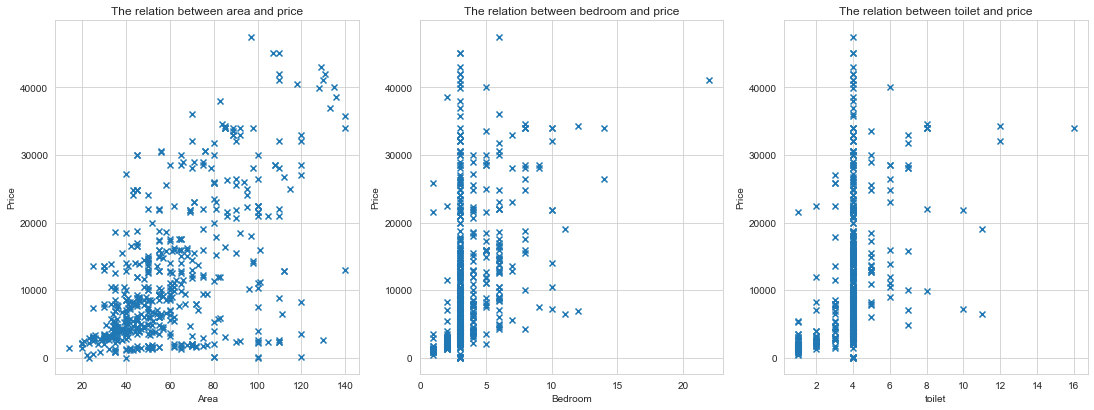

In [44]:
fig, ax =plt.subplots(1,3)
ax[0].scatter(x=data['area'].values, y=data['price'].values, marker='x')
ax[0].set_title('The relation between area and price')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Price')

ax[1].scatter(x=data['bedroom'].values, y=data['price'].values, marker='x')
ax[1].set_title('The relation between bedroom and price')
ax[1].set_xlabel('Bedroom')
ax[1].set_ylabel('Price')

ax[2].scatter(x=data['toilet'].values, y=data['price'].values, marker='x')
ax[2].set_title('The relation between toilet and price')
ax[2].set_xlabel('toilet')
ax[2].set_ylabel('Price')

fig.set_size_inches(18.5, 6.5)
plt.show()

#### Vẽ biểu đồ phân bố thể hiện phân bố của giá nhà theo các hướng, nhận xét.

<AxesSubplot:xlabel='house_direction', ylabel='price'>

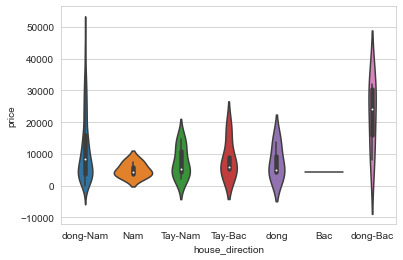

In [45]:
sns.violinplot(x='house_direction', y='price', data=data)

<AxesSubplot:xlabel='house_direction', ylabel='price'>

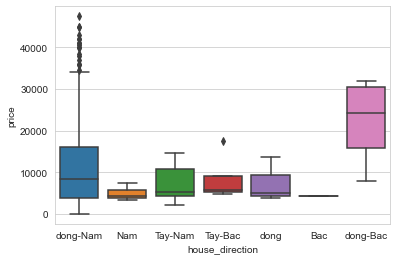

In [46]:
sns.boxplot(x='house_direction', y='price', data=data)

In [47]:
#Hướng Đông Bắc có giá nhà cao hơn so với các hướng khác
# 75% nhà hướng đông bắc có giá cao hơn so với nhà có hướng Nam, tay Nam, tây bắc
# Dữ liệu hướng nhà đã được xử lý số liệu nên độ chính xác không còn cao, cụ thể hướng nhà đông nam vì dữ liệu ngoaij lai nhiều đã dẫn đên 
#phân bố của trung vị (chấm màu trắng) tăng giá trị, làm cho phân phối không chuẩn và bị lệch

#### Vẽ biểu đồ tần số để đếm số nhà ở mỗi hướng nhà, nhận xét.

<AxesSubplot:xlabel='house_direction', ylabel='count'>

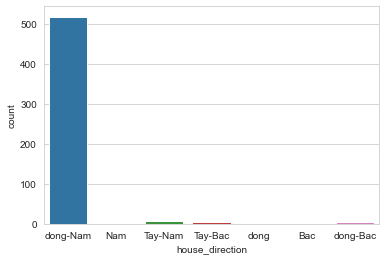

In [48]:
sns.countplot(x='house_direction', data=data)